In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

In [2]:
#修改working directory位置(有需要輸出檔案再用)
import os
os.chdir("D:\\python資料科學概論\\輸出用")

## 上次的步驟

In [3]:
df = pd.read_csv("D:/python資料科學概論/data2/covid_19_data.csv")
# rename columns
df.rename(columns = {'Country/Region' : 'Country_Region'}, inplace = True)
# keep column we need
df = df[['Country_Region','ObservationDate', 'Confirmed','Deaths','Recovered']]
# 名稱統一
df['Country_Region']= df['Country_Region'].replace(['Mainland China'],'China') # 取代
#依國家和觀察日期取max值
df_all = df.groupby(['Country_Region','ObservationDate']).max()
#make Country_Region & Last_Update to colunms
df_all.reset_index(inplace=True)
#let date as datetime
df_all['Date'] = pd.to_datetime(df_all['ObservationDate'], format='%m/%d/%Y')

#USA
df_usa = df_all[df_all.Country_Region == 'US']
df_usa.reset_index(drop=True)

#China
df_china = df_all[df_all.Country_Region == 'China']
df_china.reset_index(drop=True)

,Country_Region,ObservationDate,Confirmed,Deaths,Recovered,Date
0,China,01/01/2021,68149.0,4512.0,63637.0,2021-01-01
1,China,01/02/2021,68149.0,4512.0,63637.0,2021-01-02
2,China,01/03/2021,68149.0,4512.0,63637.0,2021-01-03
3,China,01/04/2021,68149.0,4512.0,63637.0,2021-01-04
4,China,01/05/2021,68149.0,4512.0,63637.0,2021-01-05
...,...,...,...,...,...,...
489,China,12/27/2020,68149.0,4512.0,63637.0,2020-12-27
490,China,12/28/2020,68149.0,4512.0,63637.0,2020-12-28
491,China,12/29/2020,68149.0,4512.0,63637.0,2020-12-29
492,China,12/30/2020,68149.0,4512.0,63637.0,2020-12-30


In [4]:
# change date to index
df_usa.set_index(pd.to_datetime(df_usa['ObservationDate']),inplace=True)
df_usa = df_usa.sort_values(by=['Date'])

df_china.set_index(pd.to_datetime(df_china['ObservationDate']),inplace=True)
df_china = df_china.sort_values(by=['Date'])

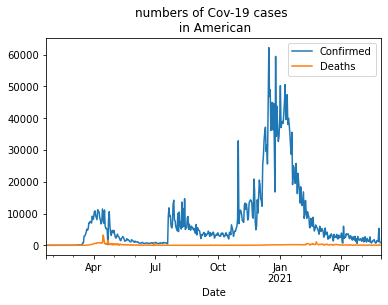

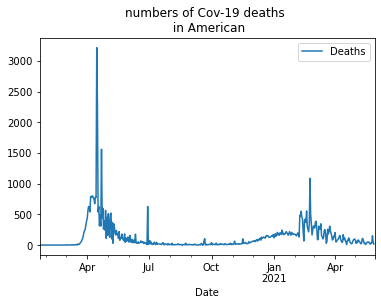

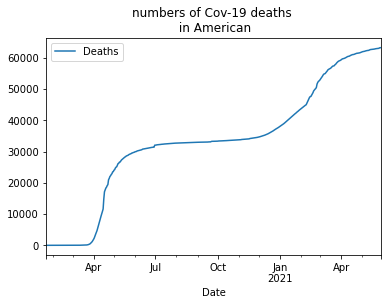

In [5]:
# 直接相減(美國)
df_usa['Confirmed_inceasing'] = df_usa.iloc[:,2].shift(-1) - df_usa.iloc[:,2]
df_usa['Deaths_inceasing'] = df_usa.iloc[:,3].shift(-1) - df_usa.iloc[:,3]
df_usa['Recover_inceasing'] = df_usa.iloc[:,3].shift(-1) - df_usa.iloc[:,3]

# plot
# only confirmed and deaths
data = pd.DataFrame()
data["Date"] = df_usa["Date"]
data["Confirmed"] = df_usa["Confirmed_inceasing"]
data["Deaths"] = df_usa["Deaths_inceasing"]
data = data.set_index("Date")
data.plot(kind="line",title="numbers of Cov-19 cases \n in American")

# only deaths
data = pd.DataFrame()
data["Date"] = df_usa["Date"]
data["Deaths"] = df_usa["Deaths_inceasing"]
data = data.set_index("Date")
data.plot(kind="line",title="numbers of Cov-19 deaths \n in American")

# only deaths(agg)
data = pd.DataFrame()
data["Date"] = df_usa["Date"]
data["Deaths"] = df_usa["Deaths"]
data = data.set_index("Date")
data.plot(kind="line",title="numbers of Cov-19 deaths \n in American")


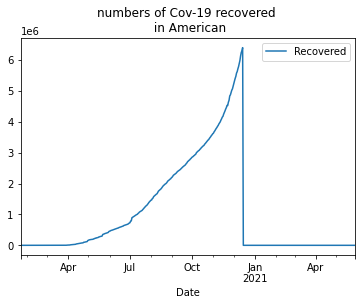

In [6]:
# only recovered(agg)
data = pd.DataFrame()
data["Date"] = df_usa["Date"]
data["Recovered"] = df_usa["Recovered"]
data = data.set_index("Date")
data.plot(kind="line",title="numbers of Cov-19 recovered \n in American")
plt.savefig("recovered.png", bbox_inches='tight') #bbox_inches='tight'確保截好圖

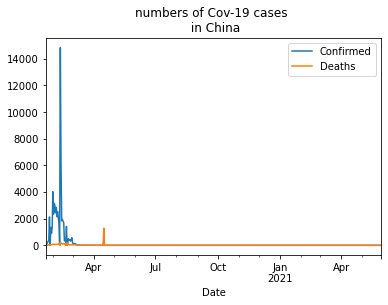

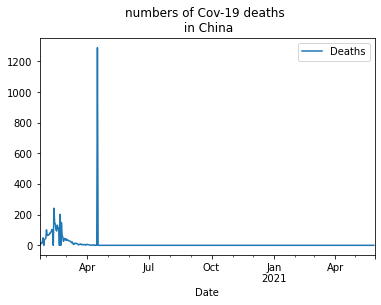

In [7]:
# 直接相減(中國)
df_china['Confirmed_inceasing'] = df_china.iloc[:,2].shift(-1) - df_china.iloc[:,2]
df_china['Deaths_inceasing'] = df_china.iloc[:,3].shift(-1) - df_china.iloc[:,3]

# plot
# only confirmed and deaths
data = pd.DataFrame()
data["Date"] = df_china["Date"]
data["Confirmed"] = df_china["Confirmed_inceasing"]
data["Deaths"] = df_china["Deaths_inceasing"]
data = data.set_index("Date")
data.plot(kind="line",title="numbers of Cov-19 cases \n in China")

# only deaths
data = pd.DataFrame()
data["Date"] = df_china["Date"]
data["Deaths"] = df_china["Deaths_inceasing"]
data = data.set_index("Date")
data.plot(kind="line",title="numbers of Cov-19 deaths \n in China")

## 資料處理：美國
>周資料

c:\venv\data_env\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


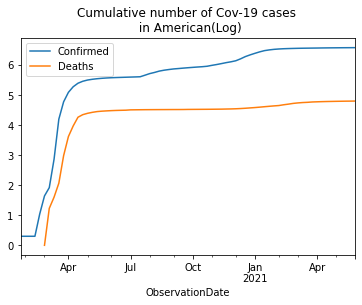

In [8]:
#do log
# American Confirmed weekly
us_wc = df_usa['Confirmed'].resample('W').last() #取一週中最後一筆的資料
us_wc = pd.DataFrame(us_wc)
us_wc['Log_Confirmed'] = np.log10(us_wc['Confirmed'])

# American Deathed weekly
us_wd = df_usa['Deaths'].resample('W').last() 
us_wd=pd.DataFrame(us_wd)
us_wd['Log_Deaths'] = np.log10(us_wd['Deaths'])
# warning: log0 = -inf

# only confirmed and deaths(log)
data = pd.DataFrame()
data["Confirmed"] = us_wc["Log_Confirmed"]
data["Deaths"] = us_wd["Log_Deaths"]
data.plot(kind="line",title="Cumulative number of Cov-19 cases \n in American(Log)")

## 資料處理：中國
> 周資料

In [9]:
# China Confirmed weekly
ch_wc = df_china['Confirmed'].resample('W').last()#取一週中最後一筆的資料
ch_wc=pd.DataFrame(ch_wc)
ch_wc['Log_Confirmed'] = np.log10(ch_wc['Confirmed'])

# China Deathed weekly
ch_wd = df_china['Deaths'].resample('W').last() 
ch_wd=pd.DataFrame(ch_wd)
ch_wd['Log_Deaths'] = np.log10(ch_wd['Deaths'])

In [10]:
# 直接相減取log(中國)
ch_wc['Confirmed_Log_inceasing'] =np.log10(ch_wc.iloc[:,0].shift(-1) - ch_wc.iloc[:,0])
ch_wd['Deaths_Log_inceasing'] = np.log10(ch_wd.iloc[:,0].shift(-1) - ch_wd.iloc[:,0])
ch_wc['Confirmed_inceasing'] =ch_wc.iloc[:,0].shift(-1) - ch_wc.iloc[:,0]
ch_wd['Deaths_inceasing'] = ch_wd.iloc[:,0].shift(-1) - ch_wd.iloc[:,0]


# 直接相減取log(美國)
us_wc['Confirmed_Log_inceasing'] = np.log10(us_wc.iloc[:,0].shift(-1) - us_wc.iloc[:,0])
us_wd['Deaths_Log_inceasing'] = np.log10(us_wd.iloc[:,0].shift(-1) - us_wd.iloc[:,0])
us_wc['Confirmed_inceasing'] = us_wc.iloc[:,0].shift(-1) - us_wc.iloc[:,0]
us_wd['Deaths_inceasing'] = us_wd.iloc[:,0].shift(-1) - us_wd.iloc[:,0]
# warning: log0 = -inf

c:\venv\data_env\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


## 合併周資料

In [11]:
# meger all df(us)
dfm = pd.concat([us_wc, us_wd],axis=1)
dfm.reset_index(inplace=True) 
dfm.insert(1,column="Country",value="US")

# meger all df(china)
dfm1 = pd.concat([ch_wc, ch_wd],axis=1)
dfm1.reset_index(inplace=True) 
dfm1.insert(1,column="Country",value="China")

dfm_all = pd.concat([dfm, dfm1],axis=0)

In [12]:
dfm1

,ObservationDate,Country,Confirmed,Log_Confirmed,Confirmed_Log_inceasing,Confirmed_inceasing,Deaths,Log_Deaths,Deaths_Log_inceasing,Deaths_inceasing
0,2020-01-26,China,1058.0,3.024486,4.005138,10119.0,52.0,1.716003,2.474216,298.0
1,2020-02-02,China,11177.0,4.048325,4.266091,18454.0,350.0,2.544068,2.716838,521.0
2,2020-02-09,China,29631.0,4.471746,4.455621,28551.0,871.0,2.940018,2.916454,825.0
3,2020-02-16,China,58182.0,4.764789,3.770999,5902.0,1696.0,3.229426,2.812913,650.0
4,2020-02-23,China,64084.0,4.806750,3.450711,2823.0,2346.0,3.370328,2.618048,415.0
...,...,...,...,...,...,...,...,...,...,...
66,2021-05-02,China,68158.0,4.833517,-inf,0.0,4512.0,3.654369,-inf,0.0
67,2021-05-09,China,68158.0,4.833517,-inf,0.0,4512.0,3.654369,-inf,0.0
68,2021-05-16,China,68158.0,4.833517,0.000000,1.0,4512.0,3.654369,-inf,0.0
69,2021-05-23,China,68159.0,4.833523,-inf,0.0,4512.0,3.654369,-inf,0.0


In [13]:
# dfm.to_csv("usa.csv", index=False, encoding="utf8")
# dfm1.to_csv("china.csv", index=False, encoding="utf8")
# excel修掉-inf及nan

In [14]:
dfm_all.reset_index(inplace=True)
dfm1.reset_index(inplace=True)

## 加強做圖的部分:
> 敘述性統計、分計週資料繪圖、累計週資料繪圖

In [15]:
#敘述性統計
stat = dfm.drop(['Log_Confirmed','Confirmed_Log_inceasing','Log_Deaths','Deaths_Log_inceasing'],axis=1)
stat1 = dfm1.drop(['Log_Confirmed','Confirmed_Log_inceasing','Log_Deaths','Deaths_Log_inceasing'],axis=1)

stat_usa = stat.describe(include=['float'])
stat_china = stat1.describe(include=['float'])
stat_usa.insert(4,column="Country",value="US")
stat_china.insert(4,column="Country",value="China")
stat_all = pd.concat([stat_usa, stat_china],axis=0)
stat_all.reset_index(inplace=True) 
stat_all.to_csv("stat.csv", index=False, encoding="utf8")

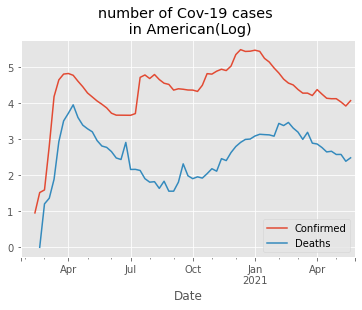

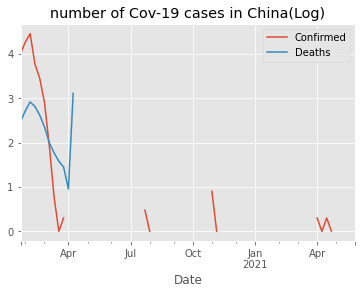

In [16]:
# usa log_inceasing plot(us)
plt.style.use('ggplot')
dfm['Date'] = pd.to_datetime(dfm['ObservationDate'], format='%m/%d/%Y')
data = pd.DataFrame()
data["Date"] = dfm["Date"]
data["Confirmed"] = dfm["Confirmed_Log_inceasing"]
data["Deaths"] = dfm["Deaths_Log_inceasing"]
data = data.set_index("Date")
data.plot(kind="line",title="number of Cov-19 cases \n in American(Log)")
plt.savefig('美國分計(確認跟死亡).png', bbox_inches='tight')

# usa log_inceasing plot(us)
plt.style.use('ggplot')
dfm1['Date'] = pd.to_datetime(dfm1['ObservationDate'], format='%m/%d/%Y')
data = pd.DataFrame()
data["Date"] = dfm1["Date"]
data["Confirmed"] = dfm1["Confirmed_Log_inceasing"]
data["Deaths"] = dfm1["Deaths_Log_inceasing"]
data = data.set_index("Date")
data.plot(kind="line",title="number of Cov-19 cases in China(Log)")
plt.savefig('中國分計(確認跟死亡).png', bbox_inches='tight')

In [17]:
dfm1.head()

,index,ObservationDate,Country,Confirmed,Log_Confirmed,Confirmed_Log_inceasing,Confirmed_inceasing,Deaths,Log_Deaths,Deaths_Log_inceasing,Deaths_inceasing,Date
0,0,2020-01-26,China,1058.0,3.024486,4.005138,10119.0,52.0,1.716003,2.474216,298.0,2020-01-26
1,1,2020-02-02,China,11177.0,4.048325,4.266091,18454.0,350.0,2.544068,2.716838,521.0,2020-02-02
2,2,2020-02-09,China,29631.0,4.471746,4.455621,28551.0,871.0,2.940018,2.916454,825.0,2020-02-09
3,3,2020-02-16,China,58182.0,4.764789,3.770999,5902.0,1696.0,3.229426,2.812913,650.0,2020-02-16
4,4,2020-02-23,China,64084.0,4.806750,3.450711,2823.0,2346.0,3.370328,2.618048,415.0,2020-02-23


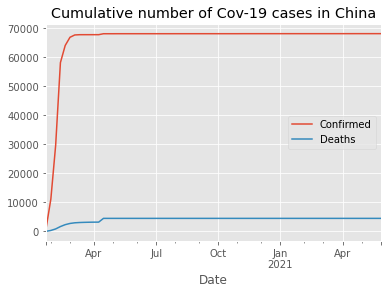

In [18]:
# china cumulative 
data = pd.DataFrame()
data["Date"] = dfm1["Date"]
data["Confirmed"] = dfm1["Confirmed"]
data["Deaths"] = dfm1["Deaths"]

data = data.set_index("Date")
data.plot(kind="line",title="Cumulative number of Cov-19 cases in China")

# save
# 適用於儲存任何 matplotlib 畫出的影象，相當於一個 screencapture
plt.savefig('中國累計.png', bbox_inches='tight')

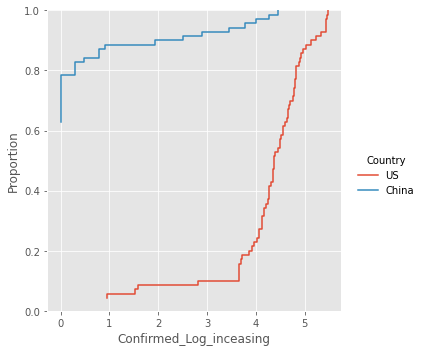

In [19]:
import seaborn as sns
fig=sns.displot(dfm_all, x="Confirmed_Log_inceasing", hue="Country", kind="ecdf")
fig.savefig('Confirmed_two.png')

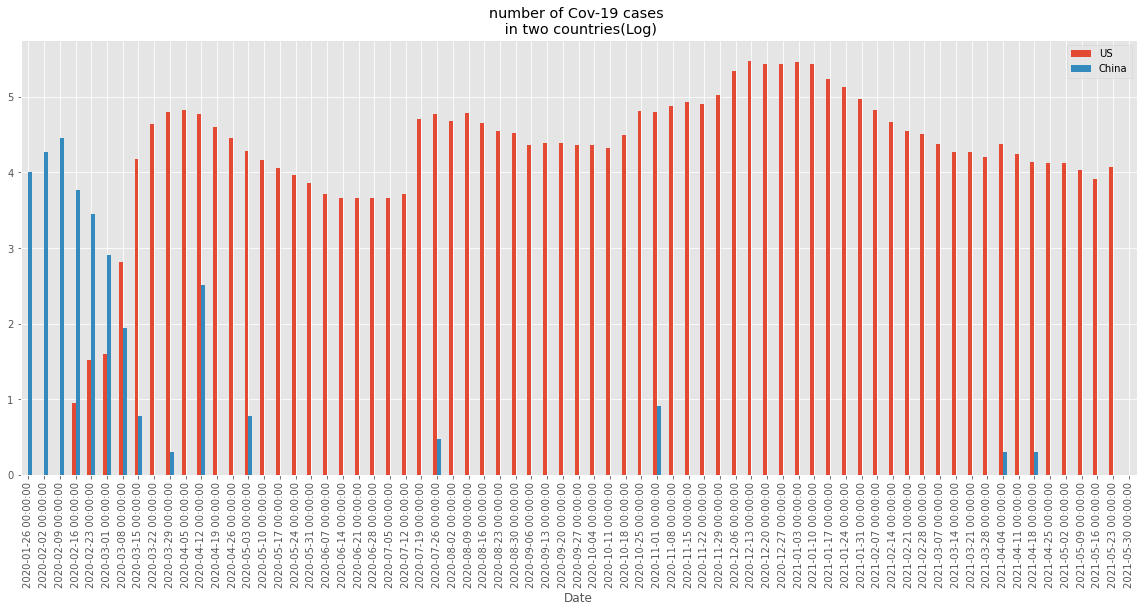

In [20]:
# usa confirmed_log_inceasing plot
plt.style.use('ggplot')
dfm.set_index(pd.to_datetime(dfm['ObservationDate']),inplace=True)
dfm1.set_index(pd.to_datetime(dfm1['ObservationDate']),inplace=True)
data = pd.DataFrame()
data["Date"] = dfm["Date"]
data["US"] = dfm["Confirmed_Log_inceasing"]
data["China"] = dfm1["Confirmed_Log_inceasing"]
data = data.set_index("Date")
data.plot(kind="bar",figsize=(20,8),title="number of Cov-19 cases \n in two countries(Log)")

## 電影資料敘事性統計&修正

In [21]:
usa20 = pd.read_csv("D:/python資料科學概論/movie_2020_America.csv")
usa21 = pd.read_csv("D:/python資料科學概論/movie_2021_America.csv")
china20 = pd.read_csv("D:/python資料科學概論/movie_2020_China.csv")
china21 = pd.read_csv("D:/python資料科學概論/movie_2021_China.csv")

In [22]:
usa20.head()

,dates,gross
0,Dec 25-31,"$36,219,846"
1,Dec 18-24,"$11,158,576"
2,Dec 11-17,"$7,996,147"
3,Dec 4-10,"$10,250,177"
4,Nov 27-Dec 3,"$16,708,864"


In [23]:
usa20[['$', 'net']] = usa20.gross.str.split('$', expand=True)  #分割欄位
usa20 = usa20.drop(['$','gross'],axis=1) # drop cloumns we don't need
usa21[['$', 'net']] = usa21.gross.str.split('$', expand=True)  #分割欄位
usa21 = usa21.drop(['$','gross'],axis=1) # drop cloumns we don't need
china20[['$', 'net']] = china20.gross.str.split('$', expand=True)  #分割欄位
china20 = china20.drop(['$','gross'],axis=1) # drop cloumns we don't need
china21[['$', 'net']] = china21.gross.str.split('$', expand=True)  #分割欄位
china21 = china21.drop(['$','gross'],axis=1) # drop cloumns we don't need

In [24]:
usa20.insert(1,column="Year",value="2020")
usa20.insert(2,column="Country",value="US")
usa21.insert(1,column="Year",value="2021")
usa21.insert(2,column="Country",value="US")
china20.insert(1,column="Year",value="2020")
china20.insert(2,column="Country",value="China")
china21.insert(1,column="Year",value="2021")
china21.insert(2,column="Country",value="China")

In [25]:
us = pd.concat([usa20, usa21],axis=0)
chi = pd.concat([china20, china21],axis=0)

In [26]:
# 敘述性統計(先用excel編輯資料to float, and use describe())
# us.to_csv("us_net.csv", index=False, encoding="utf8")
# chi.to_csv("china_net.csv", index=False, encoding="utf8")
us=pd.read_csv("us_net.csv")
chi=pd.read_csv("china_net.csv")
d_us = us['net'].describe()
d_us = pd.DataFrame(d_us)
d_us.insert(1,column="Country",value="US")
d_chi = chi['net'].describe()
d_chi = pd.DataFrame(d_chi)
d_chi.insert(1,column="Country",value="China")
d_all = pd.concat([d_us, d_chi],axis=0)
d_all.reset_index(inplace=True) 
#d_all.to_csv("movie_stat.csv", index=False, encoding="utf8")

In [27]:
us['net'] = us['net'].astype(float)
chi['net'] = chi['net'].astype(float)
us['log_movie'] = np.log10(us['net'])
chi['log_movie'] = np.log10(chi['net'])

c:\venv\data_env\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


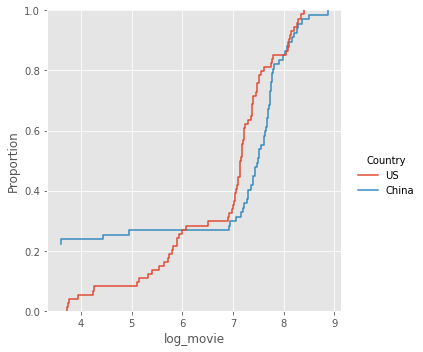

In [28]:
f_all = pd.concat([us,chi],axis=0)
# movie log plot 
fig=sns.displot(f_all, x="log_movie", hue="Country", kind="ecdf")
fig.set_titles("the distribution of movie")
# fig.savefig('log_movie.png')

In [29]:
us.head()

,dates,Year,Country,net,log_movie
0,Dec 25-31,2020,US,36219846.0,7.558947
1,Dec 18-24,2020,US,11158576.0,7.047609
2,Dec 11-17,2020,US,7996147.0,6.902881
3,Dec 4-10,2020,US,10250177.0,7.010731
4,Nov 27-Dec 3,2020,US,16708864.0,7.222947


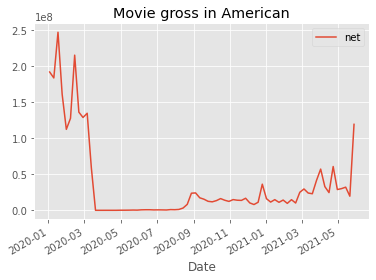

In [30]:
# us movie datetime
us[['month', 'day']] = us.dates.str.split('-', expand=True)  #分割欄位
us["Year"] = us["Year"].astype(str) #change to str to avoid error
us['Date'] = us['Year'] + " " + us['month'] # meger year, month and day()
us['Date'] = pd.to_datetime(us['Date'], format='%Y %b %d')

# us movie data plot
data = pd.DataFrame()
data["Date"] = us["Date"]
data["net"] = us["net"]
data = data.set_index("Date")
data.plot(kind="line",title="Movie gross in American")
plt.savefig('美國票房.png', bbox_inches='tight')

In [ ]:
movie_all = pd.concat([us,chi],axis=0)
sns.boxplot(data=movie_all, x= "Country", y = "net", palette="Set2")

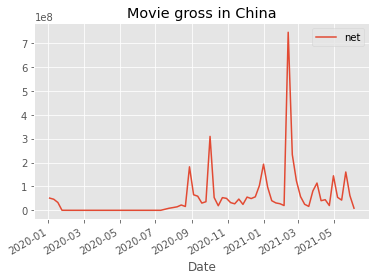

In [40]:
# china movie datetime 
chi[['month', 'day']] = chi.dates.str.split('-', expand=True)  #分割欄位
str(chi['month'])
chi["Year"] = chi["Year"].astype(str) #change to str to avoid error
chi['Date'] = chi[['Year', 'month']].apply(' '.join, axis=1)
chi['Date'] = pd.to_datetime(chi['Date'], format='%Y %b %d')
#chi.to_csv("china_test.csv", index=False, encoding="utf8")

# china movie data plot
data = pd.DataFrame()
data["Date"] = chi["Date"]
data["net"] = chi["net"]
data = data.set_index("Date")
data.plot(kind="line",title="Movie gross in China")
plt.savefig('中國票房.png', bbox_inches='tight')